<a href="https://colab.research.google.com/github/Siri0025/OIBSIP/blob/main/feature%20extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

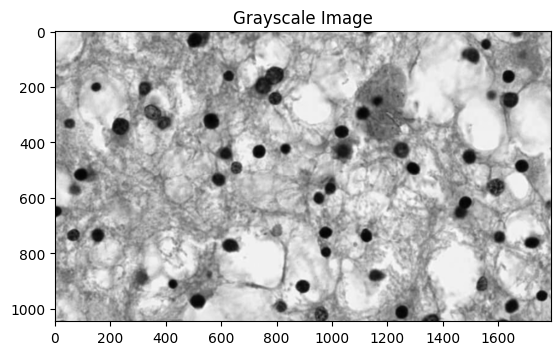

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Easy1.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()



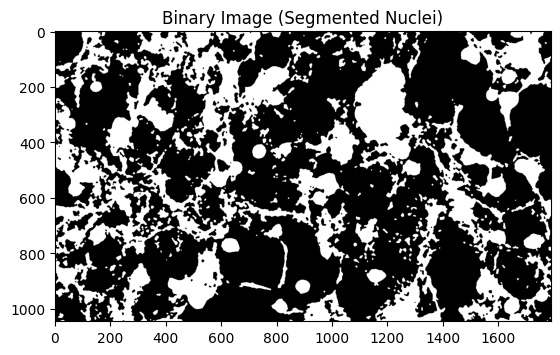

In [6]:
# Apply Otsu's Thresholding
_, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological operations to remove small noises and holes in the nuclei
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the image
binary_image = cv2.bitwise_not(binary_image)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Segmented Nuclei)')
plt.show()


In [8]:
from skimage import measure
import numpy as np

# Label the connected components in the image
labeled_nuclei = measure.label(binary_image)

# Extract properties of the labeled regions
properties = measure.regionprops(labeled_nuclei, intensity_image=gray_image)

# Extracting features
features = []
for prop in properties:
    feature = {
        'Area': prop.area,
        'Perimeter': prop.perimeter,
        'Eccentricity': prop.eccentricity,
        'Mean Intensity': prop.mean_intensity,
        'Circularity': (4 * np.pi * prop.area) / (prop.perimeter ** 2) if prop.perimeter != 0 else 0
    }
    features.append(feature)

# Display features
for i, feature in enumerate(features):
    print(f"Nucleus {i+1}: {feature}")


Nucleus 1: {'Area': 13988.0, 'Perimeter': 1736.4764055957476, 'Eccentricity': 0.8800143505863982, 'Mean Intensity': 145.64162138976266, 'Circularity': 0.05829451779930052}
Nucleus 2: {'Area': 144053.0, 'Perimeter': 14300.99605697058, 'Eccentricity': 0.6343645449434847, 'Mean Intensity': 124.53292191068564, 'Circularity': 0.008851147893044555}
Nucleus 3: {'Area': 1106.0, 'Perimeter': 194.40916292848976, 'Eccentricity': 0.48984585822478466, 'Mean Intensity': 147.14647377938516, 'Circularity': 0.36773209024232245}
Nucleus 4: {'Area': 928.0, 'Perimeter': 182.5685424949238, 'Eccentricity': 0.9565598158288453, 'Mean Intensity': 140.70689655172413, 'Circularity': 0.3498693863878223}
Nucleus 5: {'Area': 72.0, 'Perimeter': 30.485281374238568, 'Eccentricity': 0.8119116908515499, 'Mean Intensity': 159.08333333333334, 'Circularity': 0.9735582576112825}
Nucleus 6: {'Area': 15.0, 'Perimeter': 13.071067811865477, 'Eccentricity': 0.7712338800910407, 'Mean Intensity': 162.26666666666668, 'Circularity':

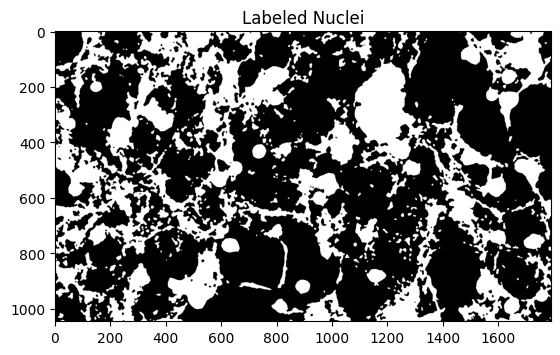

In [9]:
# Create an image with the labeled nuclei
label_image = np.zeros_like(gray_image)
for region in measure.regionprops(labeled_nuclei):
    for coords in region.coords:
        label_image[coords[0], coords[1]] = 255

# Display the labeled nuclei
plt.imshow(label_image, cmap='gray')
plt.title('Labeled Nuclei')
plt.show()


In [2]:
from skimage import measure, morphology

# Invert the binary image
inverted_binary = cv2.bitwise_not(binary)

# Perform distance transform
dist_transform = cv2.distanceTransform(inverted_binary, cv2.DIST_L2, 5)

# Apply Watershed algorithm
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(255, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)


In [3]:
# Label the image
labeled_nuclei = measure.label(markers, connectivity=2)

# Extract region properties
properties = measure.regionprops(labeled_nuclei, intensity_image=image)

# Example features: Area, Perimeter, Eccentricity, Mean Intensity
features = []
for prop in properties:
    feature = {
        'Area': prop.area,
        'Perimeter': prop.perimeter,
        'Eccentricity': prop.eccentricity,
        'Mean Intensity': prop.mean_intensity,
        'Circularity': (4 * np.pi * prop.area) / (prop.perimeter ** 2)
    }
    features.append(feature)


In [4]:
import pandas as pd

# Convert the list of features into a DataFrame
df_features = pd.DataFrame(features)

# Print or save the features
print(df_features)
df_features.to_csv('nuclei_features.csv', index=False)


        Area  Perimeter  Eccentricity  Mean Intensity  Circularity
0     5668.0     5668.0      0.745445      171.984474     0.002217
1  1866672.0     5660.0      0.811831      175.955780     0.732226
